# Rotating edge experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection

In [3]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [4]:
edges

array([[[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]]])

## split edges

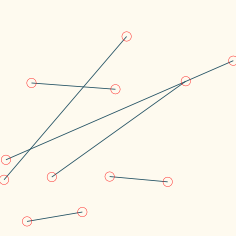

In [5]:
edges = np.random.rand(6,2,3)*100
Image(draw.draw_edges(edges, v=True))

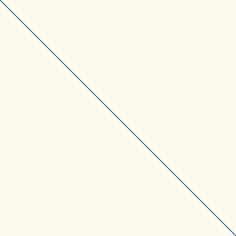

In [6]:
Image(draw.draw_edges(e*100))

In [7]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort(axis=0)
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[1].reshape(1,3),splits,e[0].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

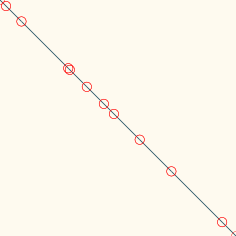

In [8]:
splits = split(e*100,10)

Image(draw.draw_edges(splits, v=True))

In [9]:
split_collection = EdgeCollection(splits, np.random.randn(*splits[:,0,:].shape))

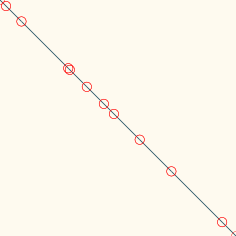

In [10]:
Image(draw.draw_edges(split_collection.edges, v=True))

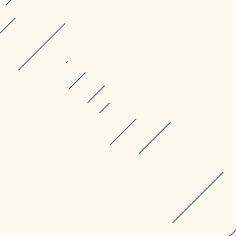

In [14]:
split_collection.move(1)
# split_collection.rotate_indiv(np.pi/50)
Image(draw.draw_edges(split_collection.edges, v=False))

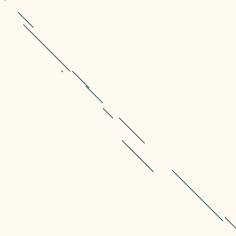

In [15]:
Image(draw.draw_edges(split_collection.rotate_indiv(np.pi/2).edges, v=False))